In [16]:
import pickle
import pandas as pd
# 从本地文件加载变量
with open('/Users/tian/Downloads/data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [15]:
X_train

<197997x475 sparse matrix of type '<class 'numpy.float64'>'
	with 15473043 stored elements in Compressed Sparse Row format>

In [11]:
import numpy as np
from sklearn.base import clone

class BaggingClassifier:
    def __init__(self, base_classifier, n_estimators, random_state=42, sample_size=None):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.sample_size = sample_size   # 新添加的参数
        self.classifiers = []
        
    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        sample_size = self.sample_size if self.sample_size is not None else n_samples  # 使用指定的sample_size或默认值
        sample_size *= len(y)
        sample_size = int(sample_size)
        y = np.array(y).ravel()
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, size=sample_size, replace=True)  # 根据sample_size抽取样本
            X_bootstrapped, y_bootstrapped = X[indices], y[indices]
            # 创建一个新的分类器实例
            classifier = clone(self.base_classifier)
            classifier.fit(X_bootstrapped, y_bootstrapped)
            self.classifiers.append(classifier)
            print('训练好了一个基分类器')
            
    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.classifiers)), dtype=int)
        for i, classifier in enumerate(self.classifiers):
            predictions[:, i] = classifier.predict(X)
        # 使用多数票投票
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)


In [12]:
from sklearn.tree import DecisionTreeClassifier

# 创建Bagging分类器，并使用决策树作为基分类器
dt_classifier = BaggingClassifier(base_classifier=DecisionTreeClassifier(class_weight='balanced', criterion='entropy'), n_estimators=30, sample_size=0.8, random_state=42)

# 训练模型
dt_classifier.fit(X_train, y_train)

# 预测
predictions = dt_classifier.predict(X_test)


训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器


Accuracy: 0.6007727272727272
Precision: 0.42074416443052326
Recall: 0.28653147210013236
F1 Score: 0.2982194387466297
Confusion Matrix:
[[  165    17    27    72   688]
 [   70    27    64   127   723]
 [   63    24   260   349  1485]
 [   49    17   155  1013  3717]
 [  116    18    91   911 11752]]


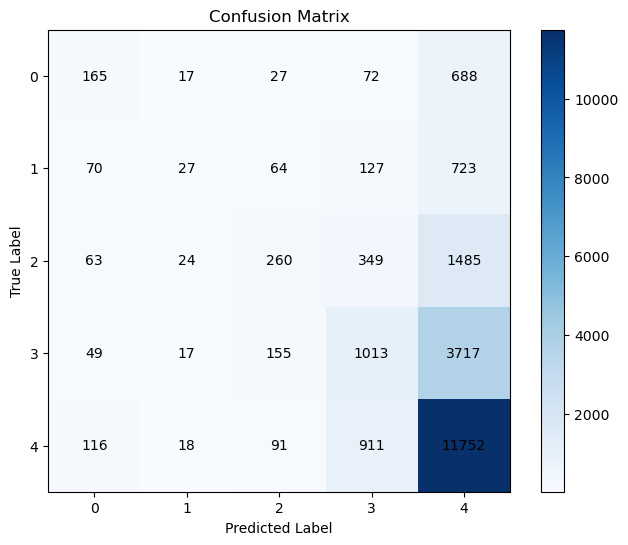

Mean Absolute Error (MAE): 0.6695
Root Mean Squared Error (RMSE): 1.227876955635954


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# 计算精确度
precision = precision_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Precision:", precision)

# 计算召回率
recall = recall_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Recall:", recall)

# 计算F1分数
f1 = f1_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("F1 Score:", f1)

# 输出混淆矩阵
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# 显示数值
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

# 设置坐标轴标签
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 设置坐标轴刻度标签
tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 计算MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Accuracy: 0.5858181818181818
Precision: 0.11716363636363636
Recall: 0.2
F1 Score: 0.14776427424902544
Confusion Matrix:
[[    0     0     0     0   969]
 [    0     0     0     0  1011]
 [    0     0     0     0  2181]
 [    0     0     0     0  4951]
 [    0     0     0     0 12888]]


/opt/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


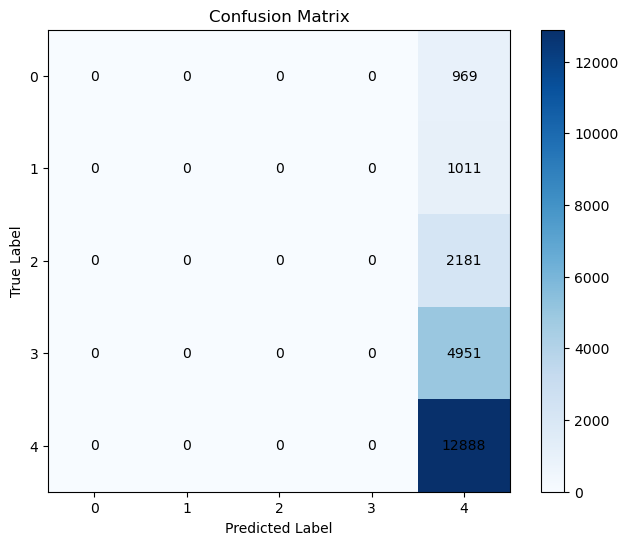

Mean Absolute Error (MAE): 0.7373636363636363
Root Mean Squared Error (RMSE): 1.3190561363752078


In [17]:
import numpy as np
predictions = np.full((len(y_test),), 5)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# 计算精确度
precision = precision_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Precision:", precision)

# 计算召回率
recall = recall_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Recall:", recall)

# 计算F1分数
f1 = f1_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("F1 Score:", f1)

# 输出混淆矩阵
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# 显示数值
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

# 设置坐标轴标签
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 设置坐标轴刻度标签
tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 计算MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
